#**Outlier Handling**


In [2]:
import pandas as pd

###Domain knowledge

In [3]:
# Real estate data frame
price = [115000, 109000, 120500, 50230, 117000, 110500, 123000, 197000, 109000, 114500]
properties = ["property1", "property2", "property3", "property4", "property5", "property6",
"property7", "property8", "property9", "property10"]
df = pd.DataFrame({'Properties': properties, 'Market_price': price})
# Heart beat data frame
beats = [64,79,23,80,99,78,56,45,72,156]
patients = ["patient1", "patient2", "patient3", "patient4", "patient5", "patient6",
"patient7", "patient8", "patient9", "patient10"]
df1 = pd.DataFrame({'Patients': patients, 'Heart_rate': beats})

In [6]:
df

Properties  Market_price
0   property1        115000
1   property2        109000
2   property3        120500
3   property4         50230
4   property5        117000
5   property6        110500
6   property7        123000
7   property8        197000
8   property9        109000
9  property10        114500

In [7]:
df1

Patients  Heart_rate
0   patient1          64
1   patient2          79
2   patient3          23
3   patient4          80
4   patient5          99
5   patient6          78
6   patient7          56
7   patient8          45
8   patient9          72
9  patient10         156

In [4]:
# Filter to detect real estate outliers
df[(df['Market_price'] < 100000) | (df['Market_price'] > 150000)]

Properties  Market_price
3  property4         50230
7  property8        197000

In [8]:
# Filter to detect heart beat outliers
df1[(df1['Heart_rate'] < 60) | (df1['Heart_rate'] > 100)]

Patients  Heart_rate
2   patient3          23
6   patient7          56
7   patient8          45
9  patient10         156

###Box plots

In [10]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
# Load the dataset as a data frame
california_housing = fetch_california_housing(as_frame=True)
df = california_housing.data

MedInc           AxesSubplot(0.125,0.657941;0.227941x0.222059)
HouseAge      AxesSubplot(0.398529,0.657941;0.227941x0.222059)
AveRooms      AxesSubplot(0.672059,0.657941;0.227941x0.222059)
AveBedrms        AxesSubplot(0.125,0.391471;0.227941x0.222059)
Population    AxesSubplot(0.398529,0.391471;0.227941x0.222059)
AveOccup      AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Latitude            AxesSubplot(0.125,0.125;0.227941x0.222059)
Longitude        AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

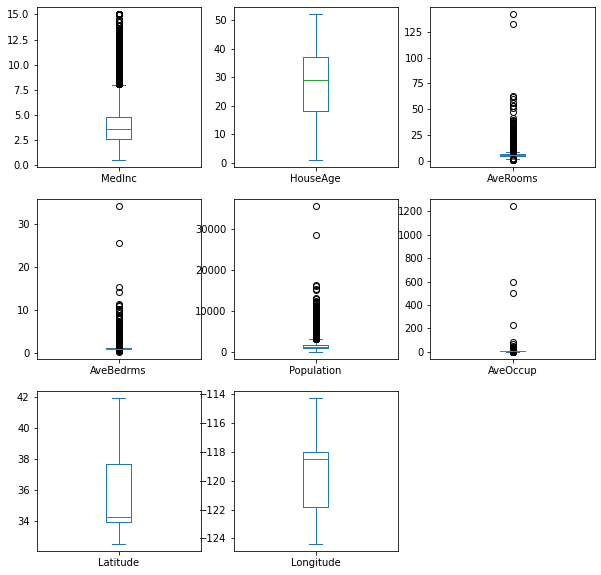

In [11]:
df.plot(kind="box", subplots=True, layout=(3,3), figsize=(10,10))

###Histogram with box plot

In [12]:
import plotly.express as px
fig = px.histogram(df, x="MedInc", marginal="box")
fig.show()

###Box plot

In [13]:
import seaborn as sns
iris = sns.load_dataset("iris")
ax = sns.boxplot(data=iris, palette="Set2")


###Scatter plots

Text(0.5, 1.0, 'AveBedrms - AveRooms')

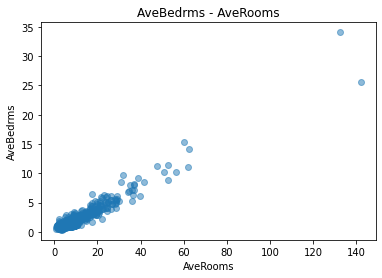

In [14]:
import matplotlib.pyplot as plt
plt.scatter(df.AveRooms, df.AveBedrms, alpha=0.5)
plt.xlabel('AveRooms')
plt.ylabel('AveBedrms')
plt.title('AveBedrms - AveRooms')

Text(0.5, 1.0, 'Population - HouseAge')

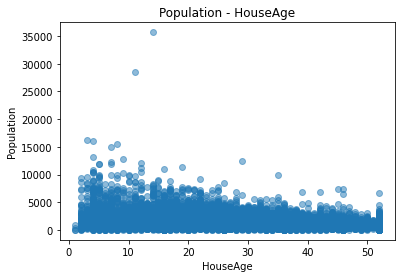

In [16]:
import matplotlib.pyplot as plt
plt.scatter(df.HouseAge, df.Population, alpha=0.5)
plt.xlabel('HouseAge')
plt.ylabel('Population')
plt.title('Population - HouseAge')

###IQR method

In [17]:
# calculate Q1 and Q3
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
# calculate the IQR
IQR = Q3 - Q1
# filter the dataset with the IQR
IQR_outliers = df[((df < (Q1-1.5*IQR)) |
(df > (Q3+1.5*IQR))).any(axis=1)]
IQR_outliers

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
41     1.2852      51.0  3.759036   1.248996       517.0  2.076305     37.83   
57     0.8172      52.0  6.102459   1.372951       728.0  2.983607     37.82   
59     2.5625       2.0  2.771930   0.754386        94.0  1.649123     37.82   
...       ...       ...       ...        ...         ...       ...       ...   
20608  1.7167      24.0  5.400000   1.273171       768.0  3.746341     39.10   
20620  4.5625      40.0  4.125000   0.854167       151.0  3.145833     39.05   
20621  2.3661      37.0  7.923567   1.573248       484.0  3.082803     39.01   
20629  2.0943      28.0  5.519802   1.020902      6912.0  3.801980     39.12   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   

       Longitude  
0        -122.23  
1        -122.22  
41       -122.26  
57       -122.28  
59       -122.29  
...          ...  
20608    -121.59  
20620    -121.48  
20621    -121.47  
20629    -121.39  
20636    -121.21  

[3798 rows x 8 columns]

In [18]:
df = df[~((df < (Q1-1.5*IQR)) |(df > (Q3+1.5* IQR))).any(axis=1)]

###Z-score

In [19]:
from scipy import stats
import numpy as np
# Calculate the z-scores
z_scores = stats.zscore(df)
z_scores

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
2      2.390058  1.821110  2.960081   0.384217   -1.228198 -0.067277   
3      1.301383  1.821110  0.614839   0.378411   -1.129112 -0.470506   
4      0.089563  1.821110  1.055739   0.498760   -1.117925 -1.051577   
5      0.218103  1.821110 -0.387214   0.837013   -1.360845 -1.117489   
6     -0.036616  1.821110 -0.225616  -1.447402   -0.272498 -1.135710   
...         ...       ...       ...        ...         ...       ...   
20634 -0.000603 -0.136893  1.527691   1.506574   -0.357201  0.287733   
20635 -1.452035 -0.381643 -0.117838   1.282694   -0.670440 -0.450432   
20637 -1.357822 -1.034311  0.034116   1.084042   -0.411538 -0.822991   
20638 -1.245064 -0.952727  0.151788   1.861602   -0.836649 -1.143948   
20639 -0.893434 -1.115894  0.080792   1.716739    0.195762 -0.361046   

       Latitude  Longitude  
2      1.028694  -1.308932  
3      1.028694  -1.313947  
4      1.028694  -1.313947  
5      1.028694  -1.313947  
6      1.024004  -1.313947  
...         ...        ...  
20634  1.694759  -0.967890  
20635  1.793261  -0.732170  
20637  1.769808  -0.797370  
20638  1.769808  -0.847523  
20639  1.741665  -0.807400  

[16842 rows x 8 columns]

In [20]:
# Convert to absolute values
abs_z_scores = np.abs(z_scores)
# Select data points with a z-scores above or below 3
filtered_entries = (abs_z_scores < 3).all(axis=1)
# Filter the dataset
df_wo_outliers = df[filtered_entries]
df_wo_outliers.shape
(19794, 8)

(19794, 8)